In [2]:
import pandas as pd
import numpy as np

In [3]:
spotify = pd.read_csv("Data/songAttributes_1999-2019.csv")
spotify = spotify.drop(columns='Unnamed: 0')
spotify['Artist'] = spotify['Artist'].str.strip("[]")
spotify['Artist'] = spotify['Artist'].str.replace("'", "").str.replace(" &", ",")
spotify['Name'] = spotify['Name'].str.lower()
spotify['Artist'] = spotify['Artist'].str.lower()

In [7]:
bb = pd.read_csv("./Data/billboardHot100_1999-2019.csv")
bb = bb.drop(columns='Unnamed: 0')
bb.rename(columns = {'Artists':'Artist'}, inplace = True)
bb['Artist'] = bb['Artist'].str.replace(" &", ",")
bb['Name'] = bb['Name'].str.lower()
bb['Artist'] = bb['Artist'].str.lower()
# date format is day, month in words, year
bb['Date'] = pd.to_datetime(bb['Date'])

In [ ]:
# bb_cols = ['Artist', 'Name', 'Weekly.rank', 'Peak.position', 'Weeks.on.chart',
#        'Week', 'Date', 'Genre', 'Writing.Credits', 'Lyrics', 'Features']
# spotifycols = ['Acousticness', 'Album', 'Artist', 'Danceability', 'Duration', 'Energy',
#        'Explicit', 'Instrumentalness', 'Liveness', 'Loudness', 'Mode', 'Name',
#        'Popularity', 'Speechiness', 'Tempo', 'TimeSignature', 'Valence']

In [53]:
bb_subset = bb[['Artist', 'Name', 'Date']]
bb_subset = bb_subset.drop_duplicates()
bb_subset = bb_subset.dropna()


In [54]:
#drop duplicates and na
bb_subset = bb_subset.drop_duplicates()
bb_subset = bb_subset.dropna()

In [49]:
spotify = spotify.groupby(['Name', 'Artist', ], as_index = False).agg({'Acousticness':'mean', 'Danceability':'mean', 'Duration':'mean', 'Energy':'mean', 'Instrumentalness':'mean', 'Liveness':'mean', 'Loudness':'mean', 'Speechiness':'mean', 'Tempo':'mean', 'Valence':'mean', 'Popularity':'mean'})

In [52]:
spotify

,Name,Artist,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity
0,!,ghostface killah,0.840000,0.317,35147.0,0.943,0.646000,0.3790,-7.730,0.0510,107.088,0.457,2.0
1,!!!!!!!,the roots,0.000072,0.245,24653.0,0.991,0.528000,0.4040,-1.973,0.4740,195.135,0.814,0.0
2,"""...after my departure i caled to mynde our co...",sting,0.693000,0.789,30120.0,0.580,0.049100,0.1160,-19.639,0.8360,94.192,0.559,7.0
3,"""...and accordinge as i desired ther cam a let...",sting,0.718000,0.498,55533.0,0.253,0.000002,0.1370,-19.916,0.6280,182.456,0.563,7.0
4,"""...and from thence i had great desire to see ...",sting,0.346000,0.720,28853.0,0.310,0.000083,0.1790,-23.719,0.1010,118.895,0.325,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129816,언젠가는,psy,0.210000,0.679,250415.0,0.655,0.000001,0.0806,-6.012,0.0568,139.911,0.576,23.0
129817,인생극장-a형,psy,0.382000,0.725,248631.0,0.809,0.000000,0.1100,-6.106,0.1340,90.041,0.846,20.0
129818,인생극장-b형,psy,0.380000,0.817,188309.0,0.989,0.000000,0.3700,-1.625,0.1780,122.049,0.633,7.0
129819,환희,psy,0.099800,0.835,205462.0,0.845,0.000004,0.0279,-2.301,0.0782,120.021,0.918,24.0


In [55]:
#add attribute columns from spotify to matching songs in billboard, inner join
final = pd.merge(bb_subset, spotify, how='inner', on=['Artist', 'Name'])



In [56]:
final

,Artist,Name,Date,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity
0,jonas brothers,sucker,2019-03-01,0.04270,0.842,181027.0,0.734,0.000000,0.1060,-5.065,0.0588,137.958,0.952,81.0
1,taylor swift,you need to calm down,2019-06-14,0.00929,0.771,171360.0,0.671,0.000000,0.0637,-5.617,0.0553,85.026,0.714,89.0
2,panic! at the disco,"hey look ma, i made it",2018-06-22,0.01370,0.577,169667.0,0.833,0.000000,0.1210,-3.337,0.0695,107.936,0.580,81.0
3,lee brice,rumor,2017-11-03,0.74900,0.655,198440.0,0.560,0.000000,0.1150,-6.857,0.0486,140.975,0.599,79.0
4,panic! at the disco,high hopes,2018-05-23,0.19300,0.579,190947.0,0.904,0.000000,0.0640,-2.729,0.0618,82.014,0.681,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,madonna,american pie,2000-03-03,0.31600,0.634,271853.0,0.674,0.000000,0.1390,-9.750,0.0370,124.001,0.523,60.0
2929,amel larrieux,get up,2000-02-15,0.31000,0.631,244867.0,0.494,0.000018,0.0640,-8.335,0.1010,88.559,0.542,43.0
2930,tracie spencer,still in my heart,2000-03-14,0.30700,0.674,257240.0,0.529,0.000002,0.0725,-6.188,0.0250,89.913,0.601,30.0
2931,will smith,freakin' it,2000-03-22,0.19800,0.873,239293.0,0.833,0.000000,0.2370,-5.511,0.1890,112.001,0.927,40.0


In [57]:
final.to_csv('charawithdates.csv')

In [116]:
import pandas as pd
import plotly.express as px

# Load your data
df = pd.read_csv('charawithdates.csv')

# Convert the 'Date' column to datetime and extract the year
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Group the data by year excluding 2019, and calculate the mean of danceability and energy, and the count of songs
filtered_data = df[df['Year'] != 2019].groupby('Year').agg({
    'Name': 'count',
    'Danceability': 'mean',
    'Energy': 'mean'
}).reset_index().rename(columns={'Name': 'Number of Songs', 'Danceability': 'Average Danceability', 'Energy': 'Average Energy'})

# Create a bubble chart with Plotly Express
fig = px.scatter(filtered_data, x="Average Danceability", y="Average Energy",
                 size="Number of Songs", color="Year",
                 hover_name="Year", size_max=40)

# Show the figure
fig.show()


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x000001F46A6683A0> (for post_execute):


ValueError: x and y must have same first dimension, but have shapes (10,) and (11,)

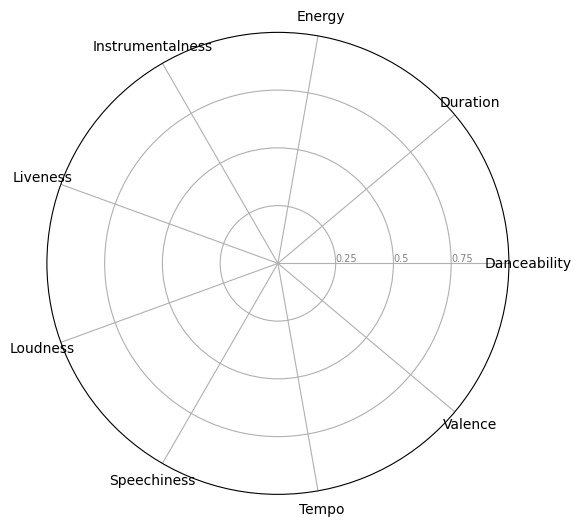

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from matplotlib.animation import FuncAnimation

# Function to plot a radar chart based on the row index of the dataframe
def plot_radar_chart(df, row_index):
    categories = list(df)[4:-1]  # Selecting the characteristic columns
    N = len(categories)
    
    values = df.loc[row_index].drop([ 'Artist', 'Name', 'Date', 'Popularity']).values.flatten().tolist()
    values += values[:1]

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0,1)

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

    date_str = df.loc[row_index, 'Date'].strftime('%Y-%m-%d')
    plt.title(df.loc[row_index, 'Name'] + " by " + df.loc[row_index, 'Artist'] + "\n" + date_str, size=11, color='black', y=1.1)


data = final

# Convert 'Date' column to datetime and sort the dataframe by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Set up the figure for animation
fig = plt.figure(figsize=(6, 6))

# Create an animation
ani = FuncAnimation(fig, lambda i: plot_radar_chart(data, i), frames=len(data), repeat=False)

# Save the animation as a GIF file
ani.save('songs_characteristics_animation.gif', writer='pillow', fps=1)


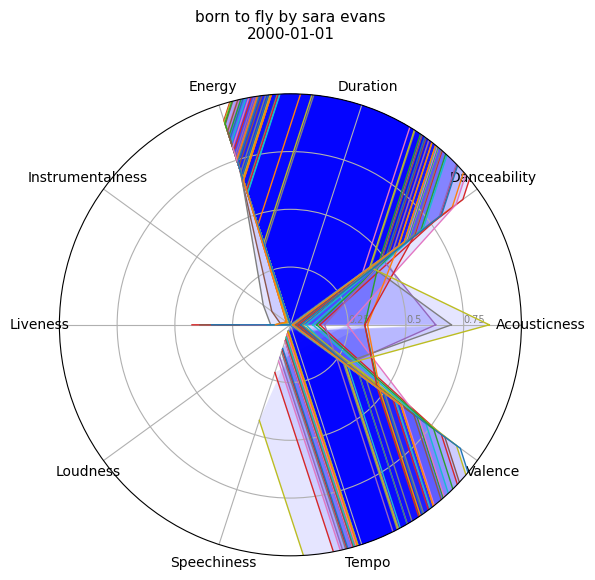

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from matplotlib.animation import FuncAnimation

# Function to plot a radar chart based on the row index of the dataframe
def plot_radar_chart(df, row_index):
    categories = list(df)[3:-1]  # Adjusting to select the characteristic columns
    N = len(categories)
    
    values = df.loc[row_index].drop(['Artist', 'Name', 'Date', 'Popularity']).values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circular graph

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Repeat the first angle to close the graph

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0,1)

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

    date_str = df.loc[row_index, 'Date'].strftime('%Y-%m-%d')
    plt.title(df.loc[row_index, 'Name'] + " by " + df.loc[row_index, 'Artist'] + "\n" + date_str, size=11, color='black', y=1.1)

# Load your CSV file

data = final.iloc[::100].reset_index(drop=True)

# Convert 'Date' column to datetime and sort the dataframe by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Set up the figure for animation
fig = plt.figure(figsize=(6, 6))

# Create an animation
ani = FuncAnimation(fig, lambda i: plot_radar_chart(data, i), frames=len(data), repeat=False)

# Save the animation as a GIF file
ani.save('songs_characteristics_animation.gif', writer='pillow', fps=1)


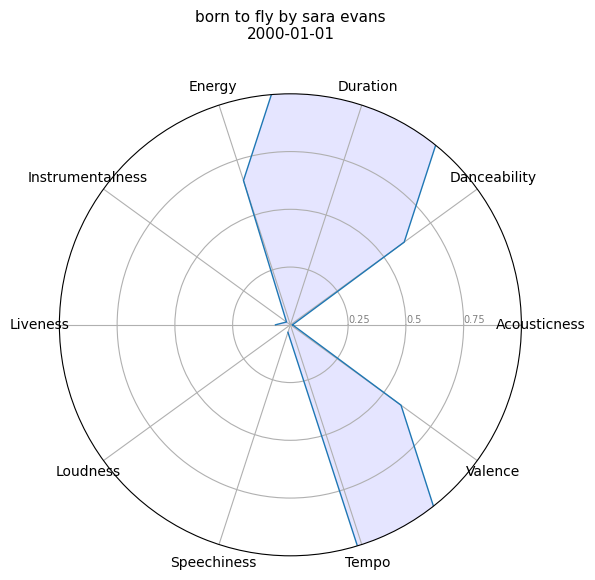

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from matplotlib.animation import FuncAnimation

# Function to plot a radar chart based on the row index of the dataframe
def plot_radar_chart(df, row_index, fig, ax):
    plt.clf()  # Clear the current figure
    ax = fig.add_subplot(111, polar=True)  # Re-add the subplot for radar chart

    categories = list(df)[3:-1]  # Adjusting to select the characteristic columns
    N = len(categories)
    
    values = df.loc[row_index].drop(['Artist', 'Name', 'Date', 'Popularity']).values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circular graph

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Repeat the first angle to close the graph

    plt.xticks(angles[:-1], categories)
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0,1)

    ax.plot(angles, values, linewidth=1, linestyle='solid')
    ax.fill(angles, values, 'b', alpha=0.1)

    date_str = df.loc[row_index, 'Date'].strftime('%Y-%m-%d')
    plt.title(df.loc[row_index, 'Name'] + " by " + df.loc[row_index, 'Artist'] + "\n" + date_str, size=11, color='black', y=1.1)

# Load your CSV file
  # Replace with your file path
data = final.iloc[::50].reset_index(drop=True)

# Convert 'Date' column to datetime and sort the dataframe by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Set up the figure for animation
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(polar=True))

# Create an animation
ani = FuncAnimation(fig, lambda i: plot_radar_chart(data, i, fig, ax), frames=len(data), repeat=False)

# Save the animation as a GIF file
ani.save('songs_characteristics_animation.gif', writer='pillow', fps=1)


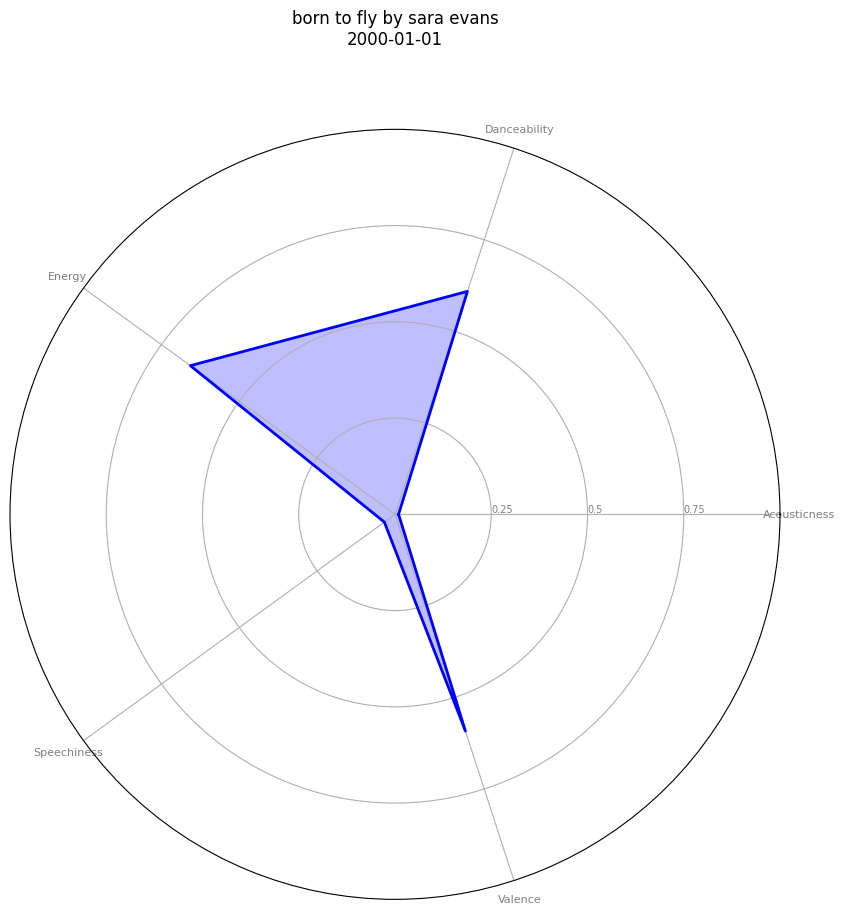

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from matplotlib.animation import FuncAnimation

# Function to plot a radar chart based on the row index of the dataframe
def plot_radar_chart(df, row_index, fig, ax):
    plt.clf()  # Clear the current figure
    ax = fig.add_subplot(111, polar=True)  # Re-add the subplot for radar chart

    # Define colors and style
    colors = ['b', 'r', 'g', 'm', 'y']  # You can adjust these colors
    line_style = '-'  # Other options: '--', '-.', ':'

    # Exclude 'Loudness' from the characteristics
    categories = list(df.drop(['Artist', 'Name', 'Date', 'Popularity', 'Loudness', 'Liveness','Instrumentalness','Duration', 'Tempo'], axis=1).columns)
    N = len(categories)
    
    values = df.loc[row_index, categories].values.flatten().tolist()
    values += values[:1]  # Repeat the first value to close the circular graph

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]  # Repeat the first angle to close the graph

    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0,1)

    ax.plot(angles, values, colors[row_index % len(colors)], linewidth=2, linestyle=line_style)
    ax.fill(angles, values, colors[row_index % len(colors)], alpha=0.25)

    date_str = df.loc[row_index, 'Date'].strftime('%Y-%m-%d')
    plt.title(df.loc[row_index, 'Name'] + " by " + df.loc[row_index, 'Artist'] + "\n" + date_str, size=12, color='black', y=1.1)


data = final.iloc[::50].reset_index(drop=True)

# Convert 'Date' column to datetime and sort the dataframe by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Set up the figure for animation
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Create an animation
ani = FuncAnimation(fig, lambda i: plot_radar_chart(data, i, fig, ax), frames=len(data), repeat=False)

# Save the animation as a GIF file
ani.save('songs_characteristics_animation.gif', writer='pillow', fps=1)


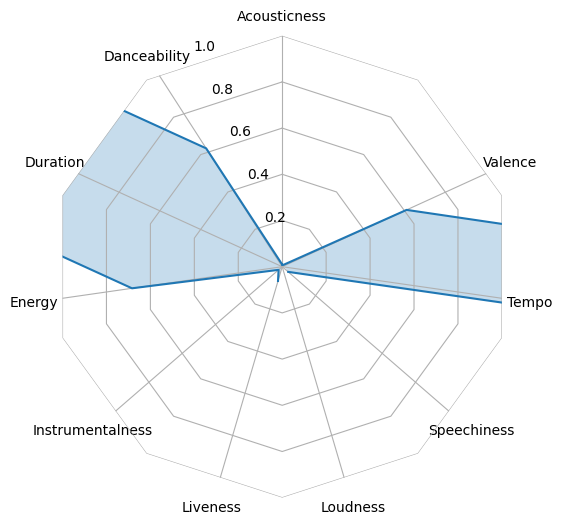

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections import register_projection
from matplotlib.projections.polar import PolarAxes
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

# The radar_factory function from your provided code
def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

def plot_radar_chart(df, row_index, theta, ax):
    values = df.loc[row_index].drop(['Artist', 'Name', 'Date', 'Popularity']).values.flatten().tolist()
    values += values[:1]  # Complete the loop
    data = np.array(values)

    # Compute angle for each axis
    # (the plot is a circle, so we need to complete the loop and stop before repeating the first value)
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    
    # Draw the outline of our data.
    ax.fill(angles, data, alpha=0.25)
    ax.plot(angles, data)

    # Beautify the plot
    ax.spines["polar"].set_visible(False)
    ax.set_ylim(0, 1)

    # Set the circular labels
    labels = list(df.drop(['Artist', 'Name', 'Date', 'Popularity'], axis=1).columns)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

# Load your CSV file
  # Replace with the path to your CSV file
data = final.iloc[::50].reset_index(drop=True)

# Use the radar_factory function to create a radar chart with a polygon frame
num_vars = len(data.columns) - 4  # Adjust for actual number of variables (excluding 'Artist', 'Name', 'Date', 'Popularity')
theta = radar_factory(num_vars, frame='polygon')

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))

# Plot one example radar chart (e.g., the first row of the dataframe)
plot_radar_chart(data, 0, theta, ax)

plt.show()


ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (5).

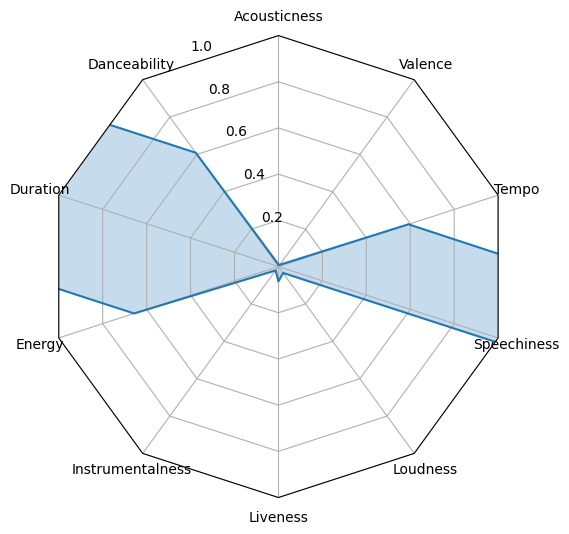

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Include your radar_factory function here

# ... (Insert radar_factory function from the previous snippet here)

def plot_radar_chart(df, row_index, theta, ax):
    values = df.loc[row_index].drop(['Artist', 'Name', 'Date', 'Popularity', 'Loudness']).values.flatten().tolist()
    values += values[:1]  # Complete the loop
    data = np.array(values)
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    
    ax.clear()  # Clear the plot to prevent overlap
    ax.set_theta_zero_location('N')
    ax.fill(angles, data, alpha=0.25)
    ax.plot(angles, data)
    ax.set_ylim(0, 1)
    
    # Set the circular labels
    labels = list(df.drop(['Artist', 'Name', 'Date', 'Popularity', 'Loudness', 'Liveness','Instrumentalness','Duration', 'Tempo'], axis=1).columns)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

def init():
    # This function will be called to create the base frame upon which the animation will be built.
    ax.set_ylim(0, 1)
    ax.set_xticks(theta)
    ax.set_xticklabels(spoke_labels)
    return ax,


data = final.iloc[::50].reset_index(drop=True)

# Assuming the CSV has been preprocessed to remove 'Loudness' and sorted by 'Date'
# Convert 'Date' column to datetime and sort the dataframe by date
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Use the radar_factory function to create a radar chart with a polygon frame
num_vars = len(data.columns) - 4  # Number of variables (excluding 'Artist', 'Name', 'Date', 'Popularity', 'Loudness')
theta = radar_factory(num_vars, frame='polygon')
spoke_labels = data.columns[3:-1].tolist()  # Adjust to match the column labels of your dataframe

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
ax.set_varlabels(spoke_labels)
# Function to update each frame of the animation
def update(i):
    return plot_radar_chart(data, i, theta, ax),

# Create the animation
anim = FuncAnimation(fig, update, init_func=init, frames=len(data), blit=False)



# Save the animation
anim.save('radar_chart_animation77.mp4', writer='ffmpeg', fps=2)

plt.show()


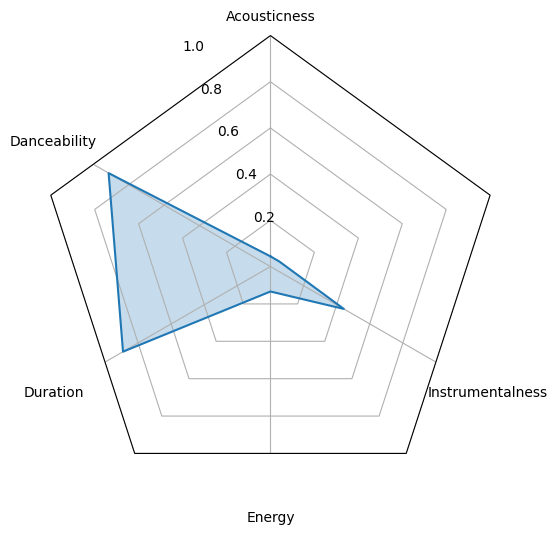

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

def plot_radar_chart(df, row_index, theta, ax, labels):
    values = df.loc[row_index].drop(['Artist', 'Name', 'Date', 'Popularity', 'Loudness', 'Liveness', 'Instrumentalness', 'Duration', 'Tempo']).values.flatten().tolist()
    values += values[:1]  # Complete the loop
    data = np.array(values)
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    
    ax.clear()  # Clear the plot to prevent overlap
    ax.set_theta_zero_location('N')
    ax.fill(angles, data, alpha=0.25)
    ax.plot(angles, data)
    ax.set_ylim(0, 1)
    
    # Set the circular labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

def init():
    # This function will be called to create the base frame upon which the animation will be built.
    ax.set_ylim(0, 1)
    ax.set_xticks(theta)
    ax.set_xticklabels(spoke_labels)
    return ax,

# Assuming the CSV has been preprocessed to remove 'Loudness' and sorted by 'Date'
data = final.iloc[::50].reset_index(drop=True)
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Use the radar_factory function to create a radar chart with a polygon frame
num_vars = len(data.columns) - 9  # Adjusted for the additional columns you are dropping
theta = radar_factory(num_vars, frame='polygon')
spoke_labels = data.columns[3:-6].tolist()  # Adjust to match the column labels of your dataframe

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
ax.set_varlabels(spoke_labels)

# Function to update each frame of the animation
def update(i):
    return plot_radar_chart(data, i, theta, ax, spoke_labels),

# Create the animation
anim = FuncAnimation(fig, update, init_func=init, frames=len(data), blit=False)

# Save the animation
anim.save('radar_chart_animation74.mp4', writer='ffmpeg', fps=2)

plt.show()


In [90]:
final2 =final.copy()
final2['Year'] = pd.to_datetime(final2['Date']).dt.year

# Grouping by the 'Year' column and calculating the average of all numeric columns
average_values_by_year = final2.groupby('Year').mean()

average_values_by_year.reset_index(inplace=True)  # Resetting the index to make 'Year' a column again


C:\Users\sarad\AppData\Local\Temp\ipykernel_27752\3348221540.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



['Duration', 'Energy', 'Instrumentalness', 'Liveness', 'Loudness', 'Speechiness', 'Tempo', 'Valence', 'Popularity']


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (9).

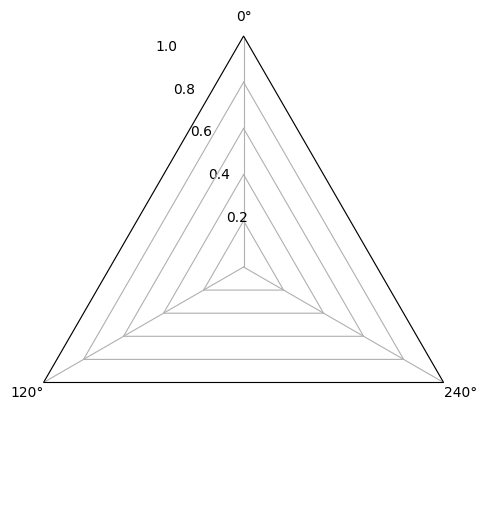

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Include your radar_factory function here
# ... (Insert radar_factory function from the previous snippet here)

def plot_radar_chart(df, row_index, theta, ax, labels):
    values = df.loc[row_index].drop([ 'Popularity', 'Loudness', 'Liveness', 'Instrumentalness', 'Duration', 'Tempo']).values.flatten().tolist()
    values += values[:1]  # Complete the loop
    data = np.array(values)
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    
    ax.clear()  # Clear the plot to prevent overlap
    ax.set_theta_zero_location('N')
    ax.fill(angles, data, alpha=0.25)
    ax.plot(angles, data)
    ax.set_ylim(0, 1)
    
    # Set the circular labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

def init():
    # This function will be called to create the base frame upon which the animation will be built.
    ax.set_ylim(0, 1)
    ax.set_xticks(theta)
    ax.set_xticklabels(spoke_labels)
    return ax,

# Assuming the CSV has been preprocessed to remove 'Loudness' and sorted by 'Date'
data = average_values_by_year

data.sort_values('Year', inplace=True)

# Use the radar_factory function to create a radar chart with a polygon frame
num_vars = len(data.columns) - 9  # Adjusted for the additional columns you are dropping
theta = radar_factory(num_vars, frame='polygon')
spoke_labels = data.columns[3:-6].tolist()  # Adjust to match the column labels of your dataframe

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
ax.set_varlabels(spoke_labels)

# Function to update each frame of the animation
def update(i):
    return plot_radar_chart(data, i, theta, ax, spoke_labels),

# Create the animation
anim = FuncAnimation(fig, update, init_func=init, frames=len(data), blit=False)

# Save the animation
anim.save('radar_chart_animation733.mp4', writer='ffmpeg', fps=2)

plt.show()


In [94]:
data

,Year,Acousticness,Danceability,Duration,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Popularity
0,2000,0.164934,0.637973,248620.140580,0.686216,0.016332,0.166146,-6.346679,0.078213,117.073280,0.572261,41.713043
1,2001,0.160913,0.637528,248794.231830,0.707718,0.010839,0.177498,-5.853832,0.089499,117.872911,0.574480,42.550752
2,2002,0.158434,0.631097,252330.437367,0.704118,0.011741,0.190482,-5.852344,0.088490,117.271116,0.549986,41.574310
3,2003,0.170962,0.586394,243353.390411,0.713835,0.020429,0.189709,-5.692874,0.110159,122.541614,0.525849,40.196347
4,2004,0.171306,0.612087,238896.894231,0.702435,0.008424,0.181184,-5.866636,0.106832,121.349749,0.545135,41.430876
5,2005,0.144589,0.611226,235218.184981,0.742407,0.011179,0.205014,-5.494071,0.101287,119.871505,0.544364,41.472771
6,2006,0.142183,0.606878,232252.151799,0.732896,0.002408,0.206021,-5.377859,0.093538,123.174210,0.544902,40.726042
7,2007,0.150408,0.608257,233757.687261,0.723021,0.011566,0.185204,-5.627716,0.091726,127.407144,0.539948,38.717433
8,2008,0.131554,0.597751,235301.501220,0.735877,0.008529,0.185286,-5.202253,0.073037,123.711994,0.532775,38.253415
9,2009,0.128446,0.583156,234310.411282,0.738069,0.005136,0.197033,-5.164416,0.082793,126.401558,0.511568,37.732991


ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of labels (3).

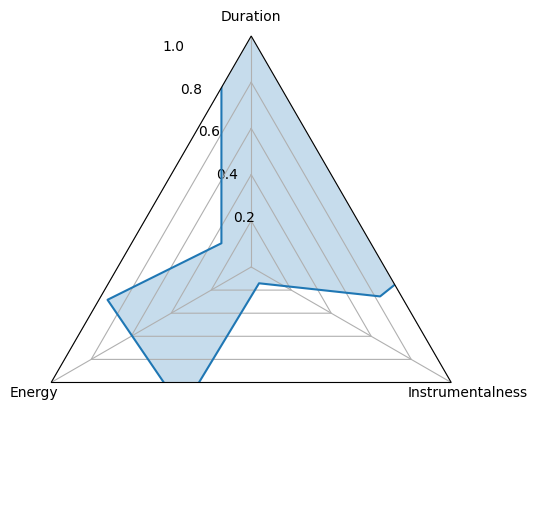

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Include your radar_factory function here
# ... (Insert radar_factory function from the previous snippet here)

def plot_radar_chart(df, row_index, theta, ax, labels):
    values = df.loc[row_index].drop([ 'Popularity', 'Loudness', 'Liveness', 'Instrumentalness', 'Duration', 'Tempo']).values.flatten().tolist()
    values += values[:1]  # Complete the loop
    data = np.array(values)
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    
    ax.clear()  # Clear the plot to prevent overlap
    ax.set_theta_zero_location('N')
    ax.fill(angles, data, alpha=0.25)
    ax.plot(angles, data)
    ax.set_ylim(0, 1)
    
    # Set the circular labels
    ax.set_xticks(angles)
    ax.set_xticklabels(labels)

def init():
    # This function will be called to create the base frame upon which the animation will be built.
    ax.set_ylim(0, 1)
    ax.set_xticks(theta)
    ax.set_xticklabels(spoke_labels)
    return ax,

# Assuming the CSV has been preprocessed to remove 'Loudness' and sorted by 'Date'
data = average_values_by_year

data.sort_values('Year', inplace=True)

# Use the radar_factory function to create a radar chart with a polygon frame
num_vars = len(data.columns) - 9  # Adjusted for the additional columns you are dropping
theta = radar_factory(num_vars, frame='polygon')
spoke_labels = data.columns[3:-6].tolist()  # Adjust to match the column labels of your dataframe

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
ax.set_varlabels(spoke_labels)

# Function to update each frame of the animation
def update(i):
    return plot_radar_chart(data, i, theta, ax, spoke_labels),

# Create the animation
anim = FuncAnimation(fig, update, init_func=init, frames=len(data), blit=False)

# Save the animation
anim.save('radar_chart_animation733.mp4', writer='ffmpeg', fps=2)

plt.show()


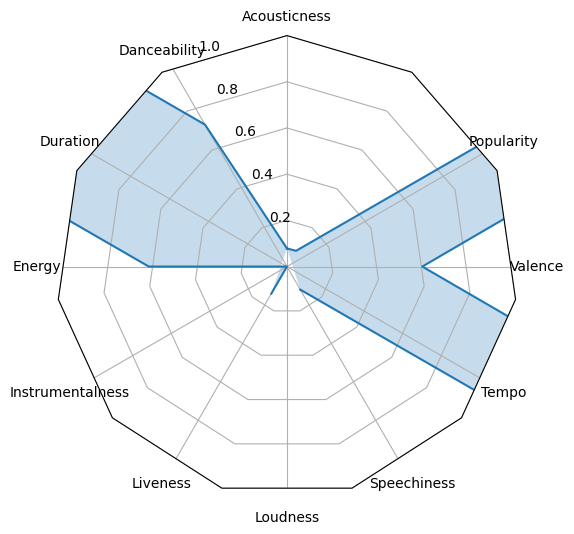

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.projections.polar import PolarAxes
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.patches import Circle, RegularPolygon



final = average_values_by_year.copy()
# Use the radar_factory function to create a radar chart with a polygon frame
num_vars = len(final.columns) - 1  # Adjusted for 'Year' column
theta = radar_factory(num_vars, frame='polygon')
spoke_labels = final.columns[1:].tolist()  # Assuming first column is 'Year'

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
ax.set_varlabels(spoke_labels)

def plot_radar_chart(df, row_index, theta, ax, labels):
    values = df.iloc[row_index, 1:].values.flatten().tolist()  # Excluding 'Year'
    values += values[:1]  # Complete the loop
    data = np.array(values)
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    
    ax.clear()  # Clear the plot to prevent overlap
    ax.set_theta_zero_location('N')
    ax.fill(angles, data, alpha=0.25)
    ax.plot(angles, data)
    ax.set_ylim(0, 1)
    
    # Set the circular labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

def init():
    ax.set_ylim(0, 1)
    ax.set_xticks(theta)
    ax.set_xticklabels(spoke_labels)
    return ax,

def update(i):
    return plot_radar_chart(final, i, theta, ax, spoke_labels),

# Create the animation
anim = FuncAnimation(fig, update, init_func=init, frames=len(final), blit=False)

# Save the animation
anim.save('radar_chart_animationqq.mp4', writer='ffmpeg', fps=2)

plt.show()


ValueError: The number of FixedLocator locations (5), usually from a call to set_ticks, does not match the number of labels (6).

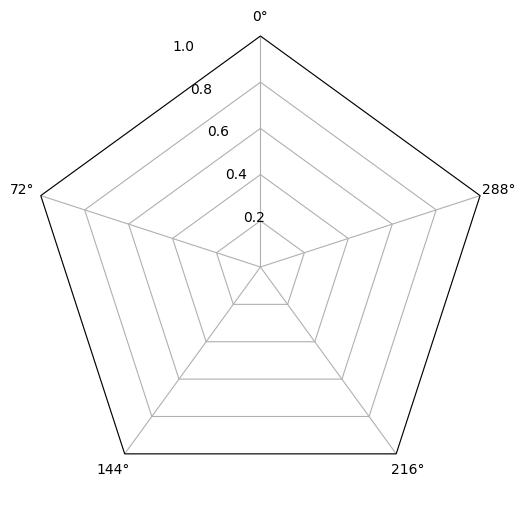

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.projections.polar import PolarAxes
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.patches import Circle, RegularPolygon


num_vars = 5  # Number of variables: Danceability, Acousticness, Energy, Instrumentalness, Liveness
theta = radar_factory(num_vars, frame='polygon')
spoke_labels = ['Danceability', 'Acousticness', 'Energy', 'Instrumentalness', 'Liveness', 'Speechiness']

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
ax.set_varlabels(spoke_labels)

def plot_radar_chart(df, row_index, theta, ax, labels):
    # Selecting only the relevant columns
    cols = ['Danceability', 'Acousticness', 'Energy', 'Instrumentalness', 'Liveness']
    values = df.loc[row_index, cols].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    data = np.array(values)
    angles = np.linspace(0, 2 * np.pi, len(values), endpoint=False).tolist()
    
    ax.clear()  # Clear the plot to prevent overlap
    ax.set_theta_zero_location('N')
    ax.fill(angles, data, alpha=0.25)
    ax.plot(angles, data)
    ax.set_ylim(0, 1)
    
    # Set the circular labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

def init():
    ax.set_ylim(0, 1)
    ax.set_xticks(theta)
    ax.set_xticklabels(spoke_labels)
    return ax,

def update(i):
    return plot_radar_chart(final, i, theta, ax, spoke_labels),

# Create the animation
anim = FuncAnimation(fig, update, init_func=init, frames=len(final), blit=False)

# Save the animation
anim.save('radar_chart_animation.mp4', writer='ffmpeg', fps=2)

plt.show()


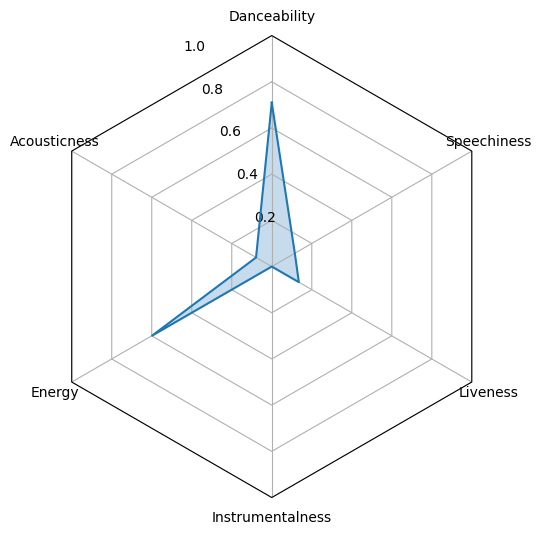

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.projections.polar import PolarAxes
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib.patches import Circle, RegularPolygon

final = average_values_by_year.copy()
num_vars = 6  # Number of variables: Danceability, Acousticness, Energy, Instrumentalness, Liveness, Speechiness
theta = radar_factory(num_vars, frame='polygon')
spoke_labels = ['Danceability', 'Acousticness', 'Energy', 'Instrumentalness', 'Liveness', 'Speechiness']

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection='radar'))
ax.set_varlabels(spoke_labels)

def plot_radar_chart(df, row_index, theta, ax, labels):
    # Selecting only the relevant columns
    cols = ['Danceability', 'Acousticness', 'Energy', 'Instrumentalness', 'Liveness', 'Speechiness']
    values = df.loc[row_index, cols].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    
    # Ensure the angles array matches the values array in length
    angles = np.linspace(0, 2 * np.pi, len(values) - 1, endpoint=False).tolist() + [0]
    
    ax.clear()  # Clear the plot to prevent overlap
    ax.set_theta_zero_location('N')
    ax.fill(angles, values, alpha=0.25)
    ax.plot(angles, values)
    ax.set_ylim(0, 1)
    
    # Set the circular labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

def init():
    ax.set_ylim(0, 1)
    ax.set_xticks(theta)
    ax.set_xticklabels(spoke_labels)
    return ax,

def update(i):
    return plot_radar_chart(final, i, theta, ax, spoke_labels),

# Create the animation
anim = FuncAnimation(fig, update, init_func=init, frames=len(final), blit=False)

# Save the animation
anim.save('radar_ff.mp4', writer='ffmpeg', fps=2)

plt.show()
